In [2]:
import numpy as np
import pandas as pd
import random
import os
import tqdm.notebook as tqdm
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
#from prettytable import PrettyTable
import pickle
%matplotlib inline

In [3]:
datafile =  "Project_final_clean_data.csv"
df = pd.read_csv(datafile, index_col=False)

In [4]:
print('Dataframe shape is ',df.shape)
df.head()

Dataframe shape is  (7616509, 46)


,Unnamed: 0,Src IP,Src Port,Dst IP,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Idle Std,y
0,0,1821919320,37882,172316925,6,8660,1,1,0.0,0.0,...,0,0,1.0,-1,225,0,0.0,0.0,0.0,1
1,1,172316928,80,1821991,6,5829,4,3,935.0,0.0,...,1,1,0.0,-1,32768,0,0.0,0.0,0.0,1
2,2,5214136135,63095,172316928,6,3396,1,1,0.0,0.0,...,0,0,1.0,-1,32738,0,0.0,0.0,0.0,1
3,3,18216200189,52341,172316928,6,2390,1,1,0.0,0.0,...,0,0,1.0,-1,32738,0,0.0,0.0,0.0,1
4,4,172316928,80,1821855126,6,17362,4,3,935.0,0.0,...,1,1,0.0,-1,32768,0,0.0,0.0,0.0,1


In [5]:
##get rid of unnamed column

df.drop('Unnamed: 0',axis=1,inplace=True)
print('Dataframe shape is ',df.shape)

df.columns

Dataframe shape is  (7616509, 45)


Index(['Src IP', 'Src Port', 'Dst IP', 'Protocol', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Idle Std', 'y'],
      dtype='object')

In [6]:
#Lets find not categorical columns for data normalization
non_cat_col = []

for col in df.columns:
    if len(df[col].unique())> 2  :
        non_cat_col.append(col)
        
print(len(non_cat_col))
print('Non Categorical columns:\n',np.array(non_cat_col),'\n')

34
Non Categorical columns:
 ['Src IP' 'Src Port' 'Dst IP' 'Protocol' 'Flow Duration' 'Tot Fwd Pkts'
 'Tot Bwd Pkts' 'Fwd Pkt Len Max' 'Fwd Pkt Len Min' 'Fwd Pkt Len Mean'
 'Bwd Pkt Len Max' 'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Flow Byts/s'
 'Flow Pkts/s' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max' 'Fwd IAT Std'
 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max' 'Bwd IAT Min'
 'Bwd Pkts/s' 'Pkt Len Min' 'Pkt Len Var' 'Down/Up Ratio'
 'Init Fwd Win Byts' 'Init Bwd Win Byts' 'Fwd Seg Size Min' 'Active Mean'
 'Active Std' 'Idle Std'] 



In [84]:
label = df['y']
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'],axis=1),label,test_size=0.2,random_state=42,stratify=label)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (6093207, 44)
X_test shape: (1523302, 44)
y_train shape: (6093207,)
y_test shape: (1523302,)


In [85]:
##Data Normalization for non categorial columns 

for col in non_cat_col:
    minimum = X_train[col].min()
    maximum = X_train[col].max()
    X_train[col] = (X_train[col] - minimum)/(maximum - minimum)
    X_test[col] = (X_test[col] - minimum)/(maximum - minimum)

In [86]:
X_train.head()

,Src IP,Src Port,Dst IP,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Idle Std
1994346,0.007718,0.753155,0.663078,0.352941,0.458127,0.000008,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0.000000,0.034180,0.000000,0.416667,0.0,0.0,0.0
5837974,0.000772,0.990326,0.000007,1.000000,0.000006,0.000004,0.000003,0.001670,0.026495,0.009149,...,0,0,0,0.003289,0.000000,0.000000,0.166667,0.0,0.0,0.0
1396364,0.000028,0.750896,0.006751,0.352941,0.000866,0.000012,0.000003,0.000000,0.000000,0.000000,...,0,0,0,0.000000,0.125015,0.125015,0.416667,0.0,0.0,0.0
2540111,0.000772,0.788968,0.000007,1.000000,0.000008,0.000004,0.000003,0.001413,0.022418,0.007741,...,0,0,0,0.003289,0.000000,0.000000,0.166667,0.0,0.0,0.0
5945010,0.007718,0.762341,0.009087,0.352941,0.000039,0.000008,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0.000000,0.003906,0.000000,0.416667,0.0,0.0,0.0


In [ ]:
#for memory utilization lets delete the df now as its not needed
#del final_data


##We would try a few ML model and compare the F1 score and Confusion matrix to pick the best model 
1.Logistic Regression
2.Decision Tree (Gini)
3.Decision Tree (Entrophy)
4.Random Forest ( Basic)
5.Random Forest (Selected Features)



# 1. Logistic regression to start 

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from scipy.stats import randint

In [88]:
# Creating a dictionary to store the model accuracy /F1/Recall and Precision score 
model_results ={}
model_results['Logistic Regression'] ={}
model_results['DecisionTree Gini'] ={}
model_results['DecisionTree Ent.'] ={}
model_results['RandomForest Basic'] ={}
model_results['RandomForest Improved'] ={}

In [89]:
## Initialize ,Fit and train the model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [90]:
#y_pred = logreg.predict(X_test) 
accuracy =  accuracy_score(y_test,y_pred)*100     
print ("Accuracy : ", accuracy) 

precision= precision_score(y_test, y_pred)
print("Precision : ",precision )

fscore = f1_score(y_test, y_pred)
print("F1 Score  : ", fscore)

recall = recall_score(y_test, y_pred)
print("Recall : ", recall)

#put data in dict 
model_results["Logistic Regression"]["Accuracy"] = accuracy.round(3)
model_results["Logistic Regression"]["Precision"] = precision.round(3)
model_results["Logistic Regression"]["Recall"]= recall.round(3)
model_results["Logistic Regression"]["Fscore"]=fscore.round(3)

print(model_results)

Accuracy :  98.17980938776422
Precision :  0.9490708904921191
F1 Score  :  0.9462970387543748
Recall :  0.9435393540512773
{'Logistic Regression': {'Accuracy': 98.18, 'Precision': 0.949, 'Recall': 0.944, 'Fscore': 0.946}, 'DecisionTree Gini': {}, 'DecisionTree Ent.': {}, 'RandomForest Basic': {}, 'RandomForest Improved': {}}


In [91]:
#Save the model
with open('LR.pkl', 'wb') as fp:
    pickle.dump(logreg, fp, protocol=pickle.HIGHEST_PROTOCOL)

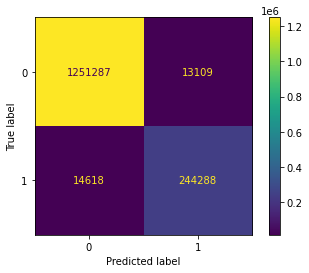

In [92]:
# Plot the confusion matrix 

plot_confusion_matrix(logreg, X_test, y_test, values_format='')
plt.show()

# 2.  Decision tree Calssifier (Gini)

In [93]:
## Decision tree using Gini
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [94]:
y_pred = clf_gini.predict(X_test) 
accuracy =  accuracy_score(y_test,y_pred)*100     
print ("Accuracy : ", accuracy) 

precision= precision_score(y_test, y_pred)
print("Precision : ",precision )

fscore = f1_score(y_test, y_pred)
print("F1 Score  : ", fscore)

recall = recall_score(y_test, y_pred)
print("Recall : ", recall)

#put data in dict 
model_results['DecisionTree Gini']["Accuracy"] = accuracy.round(3)
model_results['DecisionTree Gini']["Precision"] = precision.round(3)
model_results['DecisionTree Gini']["Recall"]= recall.round(3)
model_results['DecisionTree Gini']["Fscore"]=fscore.round(3)

print(model_results)

Accuracy :  97.25116884242257
Precision :  0.925436447106884
F1 Score  :  0.918531373971987
Recall :  0.9117285810294083
{'Logistic Regression': {'Accuracy': 98.18, 'Precision': 0.949, 'Recall': 0.944, 'Fscore': 0.946}, 'DecisionTree Gini': {'Accuracy': 97.251, 'Precision': 0.925, 'Recall': 0.912, 'Fscore': 0.919}, 'DecisionTree Ent.': {}, 'RandomForest Basic': {}, 'RandomForest Improved': {}}


In [95]:
#Save the model
with open('DTR_GN.pkl', 'wb') as fp:
    pickle.dump(clf_gini, fp, protocol=pickle.HIGHEST_PROTOCOL)

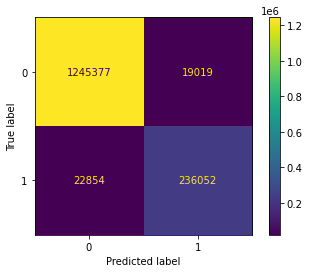

In [96]:
# Plot the confusion matrix 

plot_confusion_matrix(clf_gini, X_test, y_test, values_format='')
plt.show()

## 3. Decision Tree using entropy

In [97]:
## Decision tree using entropy
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [98]:
y_pred = clf_entropy.predict(X_test) 
accuracy =  accuracy_score(y_test,y_pred)*100     
print ("Accuracy : ", accuracy) 

precision= precision_score(y_test, y_pred)
print("Precision : ",precision )

fscore = f1_score(y_test, y_pred)
print("F1 Score  : ", fscore)

recall = recall_score(y_test, y_pred)
print("Recall : ", recall)

#put data in dict 
model_results['DecisionTree Ent.']["Accuracy"] = accuracy.round(3)
model_results['DecisionTree Ent.']["Precision"] = precision.round(3)
model_results['DecisionTree Ent.']["Recall"]= recall.round(3)
model_results['DecisionTree Ent.']["Fscore"]=fscore.round(3)

print(model_results)

Accuracy :  96.83956300195233
Precision :  0.9484567231378757
F1 Score  :  0.9025234210648865
Recall :  0.8608336616378145
{'Logistic Regression': {'Accuracy': 98.18, 'Precision': 0.949, 'Recall': 0.944, 'Fscore': 0.946}, 'DecisionTree Gini': {'Accuracy': 97.251, 'Precision': 0.925, 'Recall': 0.912, 'Fscore': 0.919}, 'DecisionTree Ent.': {'Accuracy': 96.84, 'Precision': 0.948, 'Recall': 0.861, 'Fscore': 0.903}, 'RandomForest Basic': {}, 'RandomForest Improved': {}}


In [99]:
#Save the model
with open('DTR_entro.pkl', 'wb') as fp:
    pickle.dump(clf_entropy, fp, protocol=pickle.HIGHEST_PROTOCOL)

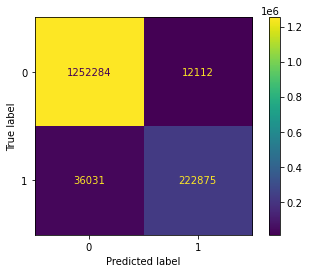

In [100]:
# Plot the confusion matrix 

plot_confusion_matrix(clf_entropy, X_test, y_test, values_format='')
plt.show()

## 4. Random Forest Classifier  (Basic)

In [101]:
##random forest using Ginni

model_RF = RandomForestClassifier(n_estimators=20 , criterion = "gini", 
            random_state = 1,max_depth=3) 
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

In [102]:
y_pred = model_RF.predict(X_test) 
accuracy =  accuracy_score(y_test,y_pred)*100     
print ("Accuracy : ", accuracy) 

precision= precision_score(y_test, y_pred)
print("Precision : ",precision )

fscore = f1_score(y_test, y_pred)
print("F1 Score  : ", fscore)

recall = recall_score(y_test, y_pred)
print("Recall : ", recall)

#put data in dict 
model_results['RandomForest Basic']["Accuracy"] = accuracy.round(3)
model_results['RandomForest Basic']["Precision"] = precision.round(3)
model_results['RandomForest Basic']["Recall"]= recall.round(3)
model_results['RandomForest Basic']["Fscore"]=fscore.round(3)

print(model_results)

Accuracy :  97.08042134783517
Precision :  0.9222299234428657
F1 Score  :  0.9132779807891052
Recall :  0.9044981576324999
{'Logistic Regression': {'Accuracy': 98.18, 'Precision': 0.949, 'Recall': 0.944, 'Fscore': 0.946}, 'DecisionTree Gini': {'Accuracy': 97.251, 'Precision': 0.925, 'Recall': 0.912, 'Fscore': 0.919}, 'DecisionTree Ent.': {'Accuracy': 96.84, 'Precision': 0.948, 'Recall': 0.861, 'Fscore': 0.903}, 'RandomForest Basic': {'Accuracy': 97.08, 'Precision': 0.922, 'Recall': 0.904, 'Fscore': 0.913}, 'RandomForest Improved': {}}


In [103]:
#Save the model
with open('radomF_Basic.pkl', 'wb') as fp:
    pickle.dump(model_RF, fp, protocol=pickle.HIGHEST_PROTOCOL)

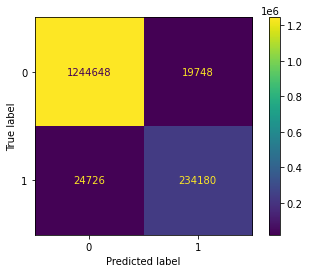

In [104]:
# Plot the confusion matrix 

plot_confusion_matrix(model_RF, X_test, y_test, values_format='')
plt.show()

## 5 Random Forest with best Selected Features 

In [105]:
##random forest using Ginni

rfclass = RandomForestClassifier(n_estimators=50, max_features="log2", oob_score=True, random_state=1)
rfclass.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=50, oob_score=True,
                       random_state=1)

In [106]:
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfclass, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfclass, threshold='median', prefit=True).transform(X_train).shape)

(6093207, 13)
(6093207, 22)


In [107]:
feature_df = pd.DataFrame({'feature':feature_cols, 'importance':rfclass.feature_importances_}).sort_values(by='importance',ascending = False)

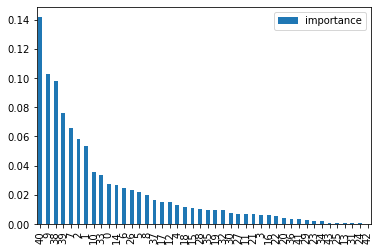

In [108]:
#lets plot 
feature_df.plot(kind='bar')

In [109]:
y_pred = rfclass.predict(X_test) 
accuracy =  accuracy_score(y_test,y_pred)*100     
print ("Accuracy : ", accuracy) 

precision= precision_score(y_test, y_pred)
print("Precision : ",precision )

fscore = f1_score(y_test, y_pred)
print("F1 Score  : ", fscore)

recall = recall_score(y_test, y_pred)
print("Recall : ", recall)

#put data in dict 
model_results['RandomForest Improved']["Accuracy"] = accuracy.round(3)
model_results['RandomForest Improved']["Precision"] = precision.round(3)
model_results['RandomForest Improved']["Recall"]= recall.round(3)
model_results['RandomForest Improved']["Fscore"]=fscore.round(3)

print(model_results)

Accuracy :  99.99914659076138
Precision :  1.0
F1 Score  :  0.9999748937328964
Recall :  0.9999497887264104
{'Logistic Regression': {'Accuracy': 98.18, 'Precision': 0.949, 'Recall': 0.944, 'Fscore': 0.946}, 'DecisionTree Gini': {'Accuracy': 97.251, 'Precision': 0.925, 'Recall': 0.912, 'Fscore': 0.919}, 'DecisionTree Ent.': {'Accuracy': 96.84, 'Precision': 0.948, 'Recall': 0.861, 'Fscore': 0.903}, 'RandomForest Basic': {'Accuracy': 97.08, 'Precision': 0.922, 'Recall': 0.904, 'Fscore': 0.913}, 'RandomForest Improved': {'Accuracy': 99.999, 'Precision': 1.0, 'Recall': 1.0, 'Fscore': 1.0}}


In [110]:
#Save the model
with open('rfclass.pkl', 'wb') as fp:
    pickle.dump(rfclass, fp, protocol=pickle.HIGHEST_PROTOCOL)

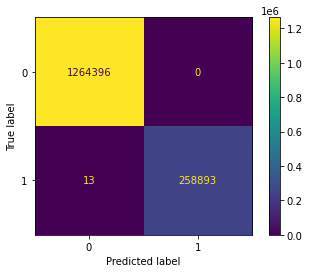

In [111]:
plot_confusion_matrix(rfclass, X_test, y_test, values_format='')
plt.show()

In [112]:
#print all models results 
print(model_results)

{'Logistic Regression': {'Accuracy': 98.18, 'Precision': 0.949, 'Recall': 0.944, 'Fscore': 0.946}, 'DecisionTree Gini': {'Accuracy': 97.251, 'Precision': 0.925, 'Recall': 0.912, 'Fscore': 0.919}, 'DecisionTree Ent.': {'Accuracy': 96.84, 'Precision': 0.948, 'Recall': 0.861, 'Fscore': 0.903}, 'RandomForest Basic': {'Accuracy': 97.08, 'Precision': 0.922, 'Recall': 0.904, 'Fscore': 0.913}, 'RandomForest Improved': {'Accuracy': 99.999, 'Precision': 1.0, 'Recall': 1.0, 'Fscore': 1.0}}


In [113]:
results_df = pd.DataFrame.from_dict(model_results)

In [116]:
print("*** Metrics and scores comparision of all models tried ****\n")
print(results_df)


*** Metrics and scores comparision of all models tried ****

           Logistic Regression  DecisionTree Gini  DecisionTree Ent.  \
Accuracy                98.180             97.251             96.840   
Precision                0.949              0.925              0.948   
Recall                   0.944              0.912              0.861   
Fscore                   0.946              0.919              0.903   

           RandomForest Basic  RandomForest Improved  
Accuracy               97.080                 99.999  
Precision               0.922                  1.000  
Recall                  0.904                  1.000  
Fscore                  0.913                  1.000  


# Results and observations
1. Out of all Classifier model Random forest models comes best In precision /Recall and acuracy.
2. We may have to do some feature tuning and more random selection to avoid over fitting of data .
3. Further research can be done to select  different feature set and see more correlations 